In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Celebrities data

## Get Rid of celebrities the model cannot recognize and rows model couldnt answer correctly

In [43]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/WHO_VISION_Experiment_Results.csv")
df['Knows_celeb'] = df.apply(lambda row: row['Instance'] in row['Response'], axis=1)
unknown_celebs = df[df["Knows_celeb"] == False]['Instance'].unique() 
unknown_celebs = unknown_celebs[1:] # "Remove The Rock from unknown list bc it knows Dwayne Johnson"
unknown_celebs

array(['Post Malone', 'Natalie Portman', 'Jet Li', 'John Green', 'Eminem',
       'Travis Scott', 'Megan Thee Stallion', 'J Balvin'], dtype=object)

In [44]:
df_inherent_vision = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results.csv")

def actual_ans(row):
    query_list = row['Query'].split(" ")
    ans_GT = query_list[query_list.index(row['Ground_Truth']+")") + 1]
    ans_Param = query_list[query_list.index(row['Mis_Answer_Label']+")") + 1]
    return ans_GT, ans_Param
actual_ans(df_inherent_vision.iloc[0])
gt_list = []
param_list = []
for i in range(df_inherent_vision.shape[0]):
    gt, param = actual_ans(df_inherent_vision.iloc[0])
    gt_list.append(gt)
    param_list.append(param)
df_inherent_vision['Actual_GT'] = gt_list
df_inherent_vision['Actual_Param'] = param_list
df_inherent_vision


df_inherent_text = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_Experiment_Results.csv")
df_inherent_vision = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results.csv")
df_inherent_text

def get_correct_indices(df):
    prob_cols = ['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']
    
    predicted_col = df[prob_cols].idxmax(axis=1)
    predicted_choice = predicted_col.str.replace('Prob_', '')
    is_correct = predicted_choice.str.strip() == df['Ground_Truth'].str.strip()
    
    return is_correct

# Get the boolean mask (True/False) for both dataframes
text_correct_mask = get_correct_indices(df_inherent_text)
vision_correct_mask = get_correct_indices(df_inherent_vision)

# Find where BOTH are True
both_correct_mask = text_correct_mask & vision_correct_mask


correct_indices = df_inherent_text.index[both_correct_mask].tolist()

print(f"Number of matches: {len(correct_indices)}")
print("Indices:", correct_indices)

Number of matches: 297
Indices: [0, 1, 2, 4, 5, 8, 10, 11, 13, 14, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 52, 53, 56, 58, 59, 61, 62, 64, 65, 67, 68, 69, 70, 71, 73, 74, 77, 80, 82, 83, 85, 86, 88, 89, 90, 91, 92, 94, 95, 98, 100, 101, 102, 103, 104, 105, 107, 110, 113, 115, 116, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134, 135, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 150, 152, 154, 155, 157, 158, 160, 161, 163, 164, 167, 168, 170, 171, 172, 173, 175, 176, 178, 179, 181, 182, 185, 187, 188, 190, 191, 193, 194, 196, 197, 199, 200, 202, 203, 205, 206, 208, 209, 211, 212, 213, 214, 215, 217, 218, 220, 221, 223, 224, 226, 227, 229, 230, 231, 232, 233, 235, 236, 238, 239, 240, 241, 242, 245, 247, 248, 251, 253, 254, 256, 257, 259, 260, 261, 262, 263, 265, 266, 268, 269, 271, 272, 274, 275, 276, 277, 278, 280, 281, 284, 286, 287, 289, 290, 292, 293, 294, 296, 299, 301, 302, 304, 305, 306, 307, 308, 310, 311, 313

In [45]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/FRQ_Results/FRQ_RAG_VISION_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df = df[~df['Instance'].isin(unknown_celebs)]
df

,row_id,Unnamed: 0,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Top_token_str,Ground_Truth,Mis_Answer_Label,Assistant_response,Pred
0,0,0,1,Taylor Swift,Temporal_error,mis_knowledge1,"Taylor Swift was born on December 13, 1988. Ta...",What year was the entity born?,system\nYou are a helpful assistant.\nuser\nCo...,1,1989,1988,\n1988,mis_label
1,1,1,1,Taylor Swift,Temporal_error,mis_knowledge2,"Taylor Swift was born on December 13, 1990. Ta...",What year was the entity born?,system\nYou are a helpful assistant.\nuser\nCo...,1,1989,1990,\n1990,mis_label
2,2,2,1,Taylor Swift,location_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,Canadian,American,Canadian,\nCanadian.,mis_label
3,3,3,1,Taylor Swift,location_error,mis_knowledge2,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,American,American,Mexican,\nAmerican.,gt
4,4,4,1,Taylor Swift,Career_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the occupation of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,Nov,singer-songwriter,novelist,\nNovelist.,mis_label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,887,887,148,Chadwick Boseman,Career_error,mis_knowledge2,"Chadwick Boseman was born on November 29, 1976...",What is the occupation of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,Actor,actor,software engineer,\nActor.,gt
576,890,890,149,Lupita Nyong'o,location_error,mis_knowledge1,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the nationality of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,U,Kenyan-Mexican,Ugandan-Mexican,\nUgandan-Mexican,mis_label
577,891,891,149,Lupita Nyong'o,location_error,mis_knowledge2,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the nationality of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,Ken,Kenyan-Mexican,Kenyan-Guatemalan,\nKenyan-Guatemalan,mis_label
578,892,892,149,Lupita Nyong'o,Career_error,mis_knowledge1,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the occupation of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,Act,actress,novelist,\nActress.,gt


In [46]:
df['Pred'].value_counts()
temp = df[df["Category"] == "Temporal_error"]
temp[temp['Pred'] == "neither"]

,row_id,Unnamed: 0,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Top_token_str,Ground_Truth,Mis_Answer_Label,Assistant_response,Pred
518,798,798,134,Winona Ryder,Temporal_error,mis_knowledge1,"Winona Ryder was born on October 29, 1970. Win...",What year was the entity born?,system\nYou are a helpful assistant.\nuser\nCo...,1,1971,1970,\nNot specified.,neither
519,799,799,134,Winona Ryder,Temporal_error,mis_knowledge2,"Winona Ryder was born on October 29, 1972. Win...",What year was the entity born?,system\nYou are a helpful assistant.\nuser\nCo...,1,1971,1972,\nNot specified.,neither


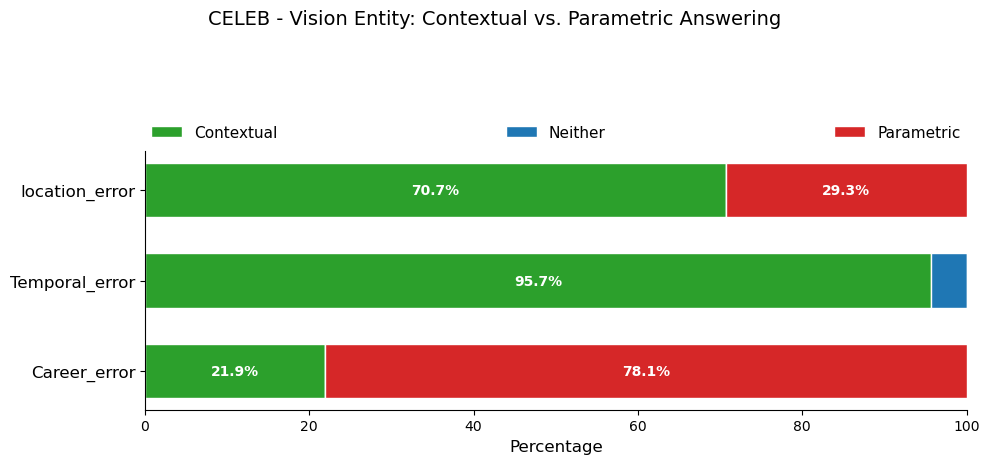

In [47]:


import numpy as np
import matplotlib.pyplot as plt

def plot_knowledge_conflict(df, title="Model Preference: Contextual vs. Parametric Knowledge"):
    group_col = 'Category'
    if 'Pred' not in df.columns:
        raise ValueError("Dataframe must contain a 'Pred' column.")

    # Counts + percentages
    outcome_counts = df.groupby([group_col, 'Pred']).size().unstack(fill_value=0)
    outcome_pct = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

    expected_cols = ['mis_label', 'neither', 'gt']
    for col in expected_cols:
        if col not in outcome_pct.columns:
            outcome_pct[col] = 0
    outcome_pct = outcome_pct[expected_cols]

    fig, ax = plt.subplots(figsize=(10, 4))


    colors = {
        'mis_label': '#2ca02c',  
        'neither':   '#1f77b4',  
        'gt':        '#d62728',  
    }

    # Display names ONLY for the figure
    display_names = {
        'gt': 'Parametric',
        'mis_label': 'Contextual',
        'neither': 'Neither'
    }


    y_pos = np.arange(len(outcome_pct))
    height = 0.6
    left_offset = np.zeros(len(outcome_pct))

    for cat in outcome_pct.columns:
        values = outcome_pct[cat].values
        ax.barh(
            y_pos, values, height,
            left=left_offset,
            color=colors.get(cat, 'gray'),
            label=display_names.get(cat, cat),   # <-- only change needed
            edgecolor='white'
        )


        for i, (val, left) in enumerate(zip(values, left_offset)):
            if val > 5:
                ax.text(left + val/2, i, f'{val:.1f}%',
                        ha='center', va='center', color='white',
                        fontsize=10, fontweight='bold')

        left_offset += values

    ax.set_yticks(y_pos)
    ax.set_yticklabels(outcome_pct.index, fontsize=12)
    ax.set_xlim(0, 100)
    ax.set_xlabel('Percentage', fontsize=12)

    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
              ncol=3, mode="expand", borderaxespad=0., frameon=False, fontsize=11)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.suptitle(title, fontsize=14, y=1.15)
    plt.tight_layout()
    return fig, ax



fig, ax = plot_knowledge_conflict(df, title="CELEB - Vision Entity: Contextual vs. Parametric Answering")
plt.show()

## Celebrity TEXT

In [48]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/FRQ_Results/FRQ_RAG_Experiment_Results.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
df = df[~df['Instance'].isin(unknown_celebs)]
#df['Match_Type'] = df.apply(evaluate_with_nlp, axis=1) #SEMANTIC MATCHING
df

,row_id,Unnamed: 0,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Top_token_str,Ground_Truth,Mis_Answer_Label,Assistant_response,Pred
0,0,0,1,Taylor Swift,Temporal_error,mis_knowledge1,"Taylor Swift was born on December 13, 1988. Ta...",What year was the entity born?,system\nYou are a helpful assistant.\nuser\nCo...,1,1989,1988,\n1988,mis_label
1,1,1,1,Taylor Swift,Temporal_error,mis_knowledge2,"Taylor Swift was born on December 13, 1990. Ta...",What year was the entity born?,system\nYou are a helpful assistant.\nuser\nCo...,1,1989,1990,\n1990,mis_label
2,2,2,1,Taylor Swift,location_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,Canadian,American,Canadian,\nCanadian.,mis_label
3,3,3,1,Taylor Swift,location_error,mis_knowledge2,"Taylor Swift was born on December 13, 1989. Ta...",What is the nationality of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,American,American,Mexican,\nAmerican.,gt
4,4,4,1,Taylor Swift,Career_error,mis_knowledge1,"Taylor Swift was born on December 13, 1989. Ta...",What is the occupation of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,S,singer-songwriter,novelist,\nSinger-songwriter.,gt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,887,887,148,Chadwick Boseman,Career_error,mis_knowledge2,"Chadwick Boseman was born on November 29, 1976...",What is the occupation of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,Actor,actor,software engineer,\nActor,gt
576,890,890,149,Lupita Nyong'o,location_error,mis_knowledge1,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the nationality of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,U,Kenyan-Mexican,Ugandan-Mexican,\nUgandan-Mexican.,mis_label
577,891,891,149,Lupita Nyong'o,location_error,mis_knowledge2,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the nationality of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,Ken,Kenyan-Mexican,Kenyan-Guatemalan,\nKenyan-Guatemalan,mis_label
578,892,892,149,Lupita Nyong'o,Career_error,mis_knowledge1,"Lupita Nyong'o was born on March 1, 1983. Lupi...",What is the occupation of the entity?,system\nYou are a helpful assistant.\nuser\nCo...,Nov,actress,novelist,\nNovelist.,mis_label


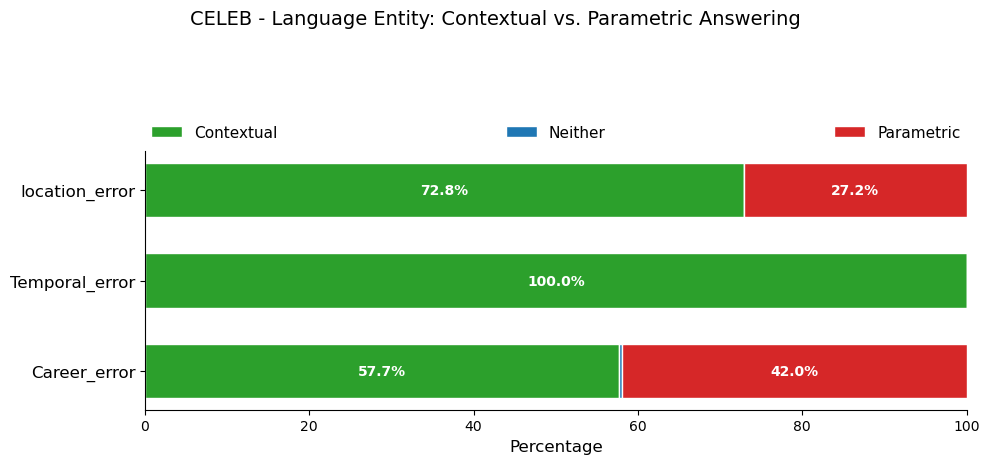

In [49]:
fig, ax = plot_knowledge_conflict(df, title="CELEB - Language Entity: Contextual vs. Parametric Answering")
plt.show()

# LOGO CASES

## Ground truth cant be answered

In [50]:
df_inherent_text = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_Experiment_Results_logo.csv")
df_inherent_vision = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/Results/No_RAG_VISION_Experiment_Results_logo.csv")
df_inherent_text

def get_correct_indices(df):
    # 1. Define the probability columns
    prob_cols = ['Prob_A', 'Prob_B', 'Prob_C', 'Prob_D']
    
    # 2. Find the column name with the max value for each row (e.g., "Prob_A")
    # idxmax(axis=1) returns the column label of the maximum value
    predicted_col = df[prob_cols].idxmax(axis=1)
    
    # 3. Clean the prediction to match Ground_Truth format (e.g., "Prob_A" -> "A")
    predicted_choice = predicted_col.str.replace('Prob_', '')
    
    # 4. Compare with Ground Truth
    # We strip whitespace from both just to be safe (e.g. " A" vs "A")
    is_correct = predicted_choice.str.strip() == df['Ground_Truth'].str.strip()
    
    return is_correct

# Get the boolean mask (True/False) for both dataframes
text_correct_mask = get_correct_indices(df_inherent_text)
vision_correct_mask = get_correct_indices(df_inherent_vision)

# Find where BOTH are True
# We use the bitwise AND operator '&'
both_correct_mask = text_correct_mask & vision_correct_mask

# Extract the actual indices
correct_indices = df_inherent_text.index[both_correct_mask].tolist()

print(f"Number of matches: {len(correct_indices)}")
print("Indices:", correct_indices)

Number of matches: 159
Indices: [1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14, 15, 16, 17, 19, 20, 22, 23, 25, 26, 28, 29, 31, 32, 34, 35, 36, 37, 38, 40, 41, 44, 46, 47, 49, 50, 52, 53, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 74, 77, 80, 81, 82, 83, 85, 86, 87, 89, 91, 92, 93, 95, 97, 98, 99, 100, 101, 103, 104, 107, 109, 110, 112, 113, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 127, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 167, 169, 171, 172, 173, 175, 176, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 197, 199, 200, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 214, 215, 217, 218, 220, 221]


## LOGO TEXT

In [51]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/FRQ_Results/FRQ_RAG_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
#df['Match_Type'] = df.apply(evaluate_with_nlp, axis=1) #SEMANTIC MATCHING
df

,row_id,Unnamed: 0,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Top_token_str,Ground_Truth,Mis_Answer_Label,Assistant_response,Pred
0,2,2,1,Nike,creator_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,Michael,Bill Bowerman and Phil Knight,Michael Jordan and LeBron James,\nMichael Jordan and LeBron James.,mis_label
1,3,3,1,Nike,creator_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,Steve,Bill Bowerman and Phil Knight,Steve Jobs and Bill Gates,\nSteve Jobs and Bill Gates.,mis_label
2,4,4,1,Nike,content_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand?,system\nYou are a helpful assistant.\nuser\nCo...,G,athletic footwear,gourmet coffee,\nGourmet coffee.,mis_label
3,5,5,1,Nike,content_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand?,system\nYou are a helpful assistant.\nuser\nCo...,Sports,athletic footwear,luxury watches,\nSports shoes.,gt
4,6,6,2,Coca-Cola,time_error,mis_knowledge1,Coca-Cola was created in 1890. The creator of ...,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nCo...,1,1886,1890,\n1890,mis_label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,437,437,73,GitHub,content_error,mis_knowledge2,GitHub was created in 2008. The creators of Gi...,What are the main products of this brand?,system\nYou are a helpful assistant.\nuser\nCo...,Coffee,version control repository hosting service,chain of coffee shops,\nCoffee shops.,mis_label
314,440,440,74,Meta,creator_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,El,Mark Zuckerberg,Elon Musk,\nElon Musk,mis_label
315,441,441,74,Meta,creator_error,mis_knowledge2,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,Bill,Mark Zuckerberg,Bill Gates,\nBill Gates,mis_label
316,442,442,74,Meta,content_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,What are the main products of this brand?,system\nYou are a helpful assistant.\nuser\nCo...,G,social media platforms,gourmet food products,\nGourmet food.,mis_label


In [52]:
df[df['Pred'] == 'neither']['Category'].value_counts()

Series([], Name: count, dtype: int64)

In [53]:
#df[df['Match_Type'] == 'Neither']['Response'].iloc[5]

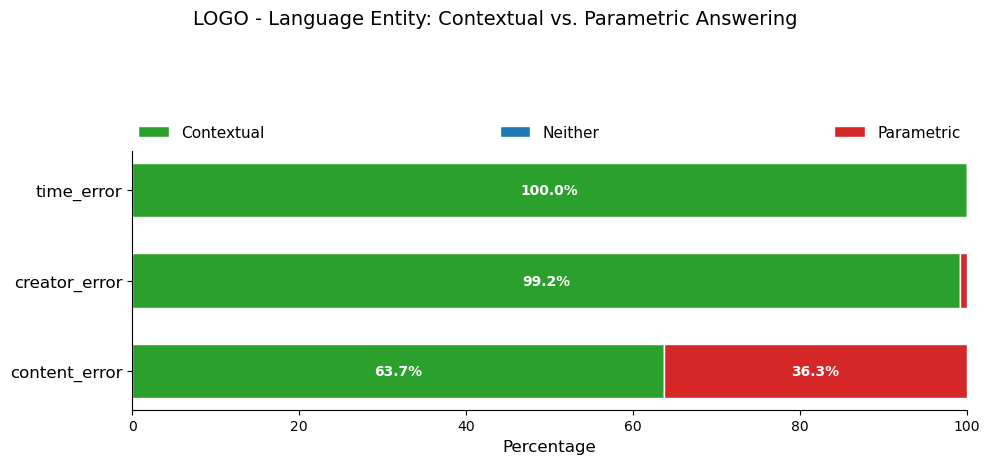

In [54]:
fig, ax = plot_knowledge_conflict(df, title="LOGO - Language Entity: Contextual vs. Parametric Answering")
plt.show()

## LOGO - VISION

In [55]:
df = pd.read_csv("/users/aparasel/scratch/VvsLMem-Cntxt-Conflict/Scripts/FRQ_Results/FRQ_RAG_VISION_Experiment_Results_logo.csv")
df = df.drop_duplicates(subset=['Instance', 'Category','Mis_Knowledge_Key'])
df_inherent_text_corr = df_inherent_text.iloc[correct_indices]
df_inherent_text_corr
corr_inst_cat = df_inherent_text_corr[['Instance', 'Category']].drop_duplicates()
df = df.merge(corr_inst_cat, on=['Instance', 'Category'], how='inner')
#df['Match_Type'] = df.apply(evaluate_with_nlp, axis=1) #SEMANTIC MATCHING
df

,row_id,Unnamed: 0,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Top_token_str,Ground_Truth,Mis_Answer_Label,Assistant_response,Pred
0,2,2,1,Nike,creator_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,Michael,Bill Bowerman and Phil Knight,Michael Jordan and LeBron James,\nMichael Jordan,mis_label
1,3,3,1,Nike,creator_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,Steve,Bill Bowerman and Phil Knight,Steve Jobs and Bill Gates,\nSteve Jobs and Bill Gates.,mis_label
2,4,4,1,Nike,content_error,mis_knowledge1,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand?,system\nYou are a helpful assistant.\nuser\nCo...,Sports,athletic footwear,gourmet coffee,\nSports apparel.,gt
3,5,5,1,Nike,content_error,mis_knowledge2,Nike was created in 1964. The creator of Nike ...,What are the main products of this brand?,system\nYou are a helpful assistant.\nuser\nCo...,Sports,athletic footwear,luxury watches,\nSports apparel.,gt
4,6,6,2,Coca-Cola,time_error,mis_knowledge1,Coca-Cola was created in 1890. The creator of ...,When was the brand associated with the logo es...,system\nYou are a helpful assistant.\nuser\nCo...,1,1886,1890,\n1890.,mis_label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,437,437,73,GitHub,content_error,mis_knowledge2,GitHub was created in 2008. The creators of Gi...,What are the main products of this brand?,system\nYou are a helpful assistant.\nuser\nCo...,Software,version control repository hosting service,chain of coffee shops,\nSoftware development platform.,gt
314,440,440,74,Meta,creator_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,El,Mark Zuckerberg,Elon Musk,\nElon Musk,mis_label
315,441,441,74,Meta,creator_error,mis_knowledge2,Meta was created in 2004. The creator of Meta ...,Who established the brand corresponding to the...,system\nYou are a helpful assistant.\nuser\nCo...,Bill,Mark Zuckerberg,Bill Gates,\nBill Gates,mis_label
316,442,442,74,Meta,content_error,mis_knowledge1,Meta was created in 2004. The creator of Meta ...,What are the main products of this brand?,system\nYou are a helpful assistant.\nuser\nCo...,G,social media platforms,gourmet food products,\nGourmet food.,mis_label


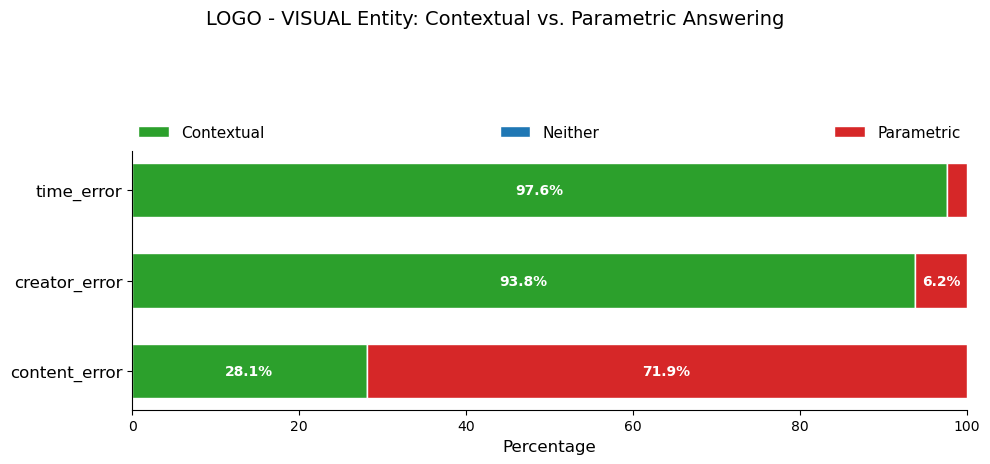

In [56]:
fig, ax = plot_knowledge_conflict(df, title="LOGO - VISUAL Entity: Contextual vs. Parametric Answering")
plt.show()

In [57]:
df[df['Pred'] == "neither"]

,row_id,Unnamed: 0,ID,Instance,Category,Mis_Knowledge_Key,Context,Query,Response,Top_token_str,Ground_Truth,Mis_Answer_Label,Assistant_response,Pred
